In [1]:
# ;export CUDA_VISIBLE_DEVICES=2

In [21]:
using CUDA, Flux
import JLD2
CUDA.device_reset!()
CUDA.device!(2)
Threads.nthreads()

16

In [22]:
include("../utils/train.jl")

In [23]:
rbm, J, m, hparams, rbmZ = initModel(nv=28*28, nh=500, batch_size=500, lr=1.5, t=10, gpu_usage = true, optType="Adam")
opt = initOptW(hparams, J);

In [24]:
# modelName = "Eigen-500-T1426"
modelName = "CD-500-T1000"
rbm, J, m, hparams, opt = loadModel(modelName, gpu, idx=-1);
x, y = loadData(; hparams, dsName="MNIST01", numbers=collect(0:9), testset=true);
TS = Test(x,y)
dict = loadDict(modelName);

[ Info: /home/javier/Projects/RBM/Results/models/CD-500-T1000
[ Info: Loadding model J_1000.
[ Info: 10000


In [5]:
dev = gpu

gpu (generic function with 5 methods)

In [6]:
PATH = "/home/javier/Projects/RBM/Results/Figs/"

"/home/javier/Projects/RBM/Results/Figs/"

In [19]:
Models = Dict()
for i in 1:5
    # Models["$i"] = load(PATH * "Rdm-500-T100-BW-replica$i/thermoParams.jld")
    Models["$i"] = load(PATH * "CD-500-T1000-5-BW-replica$i-L/thermoParams.jld")
    # Models["$i"] = load(PATH * "PCD-500-replica$i/thermoParams.jld")
end

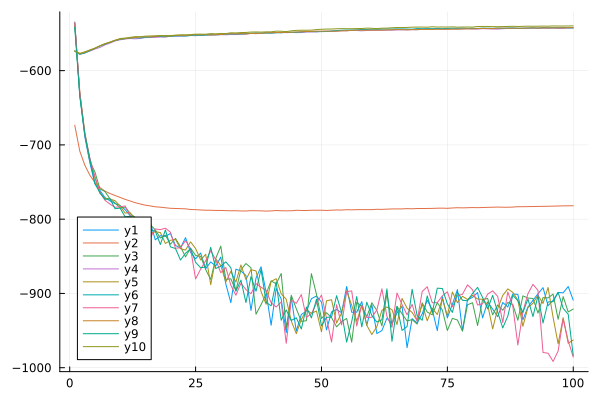

In [20]:
plot()
for i in 1:5
    plot!(Models["$i"]["srbm"])
    plot!(Models["$i"]["sdata"])
end
plot!()

In [26]:
# E0i
include("../therm.jl")

In [27]:
PATH = "/home/javier/Projects/RBM/Results/"
l=100
nv=28*28
nh=500
dev = gpu
β = 1.0
# modelName = "CD-500-T1000-5-BW-replica1-L"
modelName = "PCD-500-replica1"
rbm, J, m, hparams, opt = loadModel(modelName, gpu);
x_i, y_i = loadData(; hparams, dsName="MNIST01", numbers=collect(0:9), testset=true);

[ Info: /home/javier/Projects/RBM/Results/models/PCD-500-replica1
[ Info: Loadding model J_100.
[ Info: 10000


In [42]:
idx=24
J = load("$(PATH)/models/$(modelName)/J/J_$(idx).jld", "J")
J.w = gpu(J.w)
J.b = gpu(J.b)
J.a = gpu(J.a)
F = LinearAlgebra.svd(J.w, full=true);

In [43]:
v,h = data_val_samples(F)
umean, wmean, σ_2u, σ_2w, a0, b0, λ = compute_stats(v, h, J);

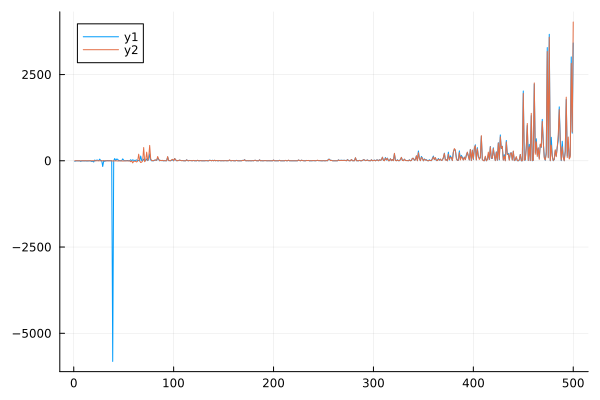

In [44]:
plot(wmean .^ 2 ./ (1 .- σ_2w .* cpu(F.S)))
plot!(umean .^ 2 ./ (1 .- σ_2u .* cpu(F.S)))
# plot!(σ_2u)

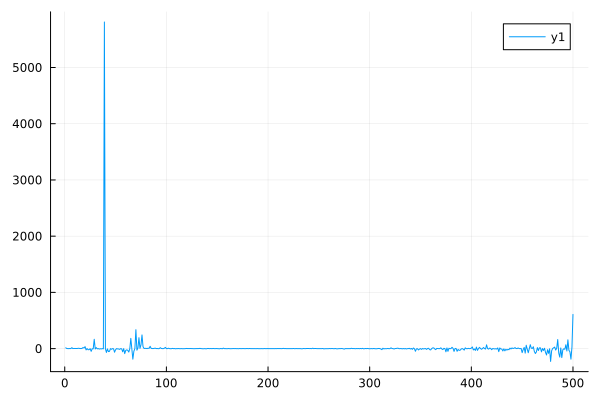

In [45]:
plot(umean .^ 2 ./ (1 .- σ_2u .* cpu(F.S)) .- wmean .^ 2 ./ (1 .- σ_2w .* cpu(F.S)))

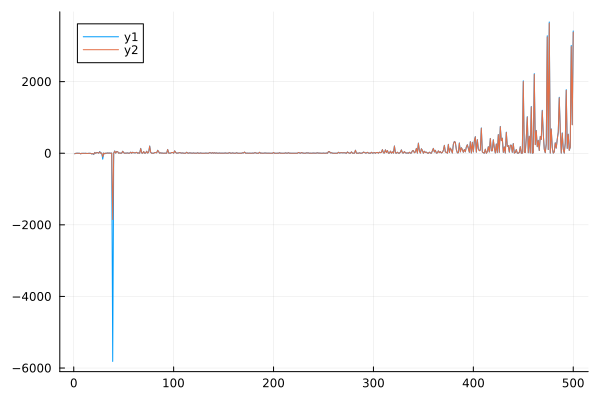

In [58]:
plot(wmean .^ 2 ./ (1 .- σ_2w .* cpu(F.S)) )
plot!(wmean .^ 2 ./ (1 .- σ_2w .* cpu(F.S) .+ sign.(1 .- σ_2w .* cpu(F.S)) * 1e-2) )

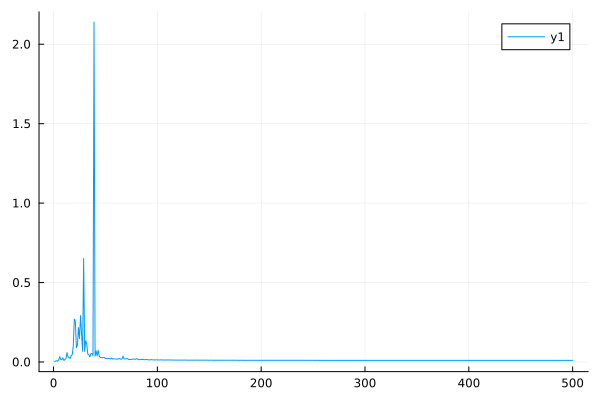

In [65]:
sign.(1 .- σ_2w .* cpu(F.S)) * 1e-5;
plot(1e-2 ./ abs.(1 .- σ_2w .* cpu(F.S)))